In [67]:
    !pip3 install tensorflow
    !pip3 install opencv-python


In [68]:
import tensorflow as  tf
from tensorflow.keras.models import Sequential, Model, model_from_json, load_model
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import string
import tensorflow.keras as keras
import numpy as numpy
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img, img_to_array






In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [70]:
import IPython
print(IPython.sys_info())


{'commit_hash': '223e783c4',
 'commit_source': 'installation',
 'default_encoding': 'utf-8',
 'ipython_path': '/Users/aadithyanair/opt/anaconda3/lib/python3.8/site-packages/IPython',
 'ipython_version': '7.19.0',
 'os_name': 'posix',
 'platform': 'macOS-10.15.5-x86_64-i386-64bit',
 'sys_executable': '/Users/aadithyanair/opt/anaconda3/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '3.8.5 (default, Sep  4 2020, 02:22:02) \n[Clang 10.0.0 ]'}


In [71]:
TRAIN_RATIO = 0.6
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.2
mnist = tf.keras.datasets.mnist

# train is now 60% of the entire data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X = numpy.concatenate([x_train, x_test])
y = numpy.concatenate([y_train, y_test])

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))
#Normalize the data
x_train = tf.keras.utils.normalize(x_train, axis = -1)
x_test = tf.keras.utils.normalize(x_test, axis = -1)
x_val = tf.keras.utils.normalize(x_val, axis = -1)


# Plotting some of the data

First 16 images:

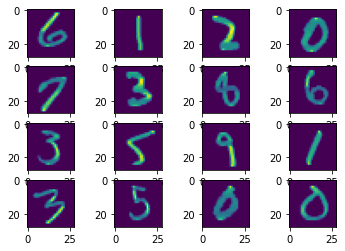

In [72]:
fig, axs = plt.subplots(4, 4)
count = 0
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(x_train[count])
        count += 1

# Basic ANN Model

In [79]:
baseModel = Sequential()
baseModel.add(Flatten(input_shape=(28,28)))
baseModel.add(Dense(units = 128, activation = 'relu'))
baseModel.add(Dense(units = 128, activation = 'relu'))
baseModel.add(Dense(units = 20, activation = 'softmax'))
baseModel.summary()

baseModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
baseModel.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=10, batch_size=100)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 20)                2580      
                                                                 
Total params: 119,572
Trainable params: 119,572
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
420/420 [==============================] - 3s 5ms/step - loss: 0.4659 - accuracy: 0.8678 - val_loss: 0.2192 - val_accuracy: 0.9345
Epoch 2/10
420/420 [==================

In [80]:
annloss, annaccuracy = baseModel.evaluate(x_test, y_test)
print("Loss : ", annloss)
print("Accuracy : ", annaccuracy)

438/438 [==============================] - 1s 2ms/step - loss: 0.1116 - accuracy: 0.9694
Loss :  0.11160706728696823
Accuracy :  0.9693571329116821


219/219 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1359
           1       0.99      0.99      0.99      1589
           2       0.97      0.97      0.97      1358
           3       0.98      0.97      0.97      1429
           4       0.96      0.98      0.97      1355
           5       0.98      0.97      0.97      1315
           6       0.99      0.99      0.99      1358
           7       0.96      0.98      0.97      1446
           8       0.97      0.97      0.97      1395
           9       0.98      0.94      0.96      1396

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

438/438 [==============================] - 1s 2ms/step
Prediction:  1


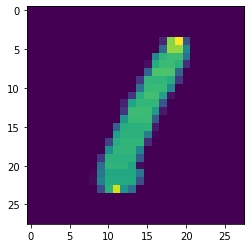

In [28]:

y_pred = baseModel.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = numpy.argmax(y_pred, axis=1)



print(classification_report(y_test, y_pred_bool))


prediction = baseModel.predict([x_test])
print('Prediction: ', numpy.argmax(prediction[20]))
plt.imshow(x_test[20])
plt.show()


In [78]:
baseModel_json = baseModel.to_json()
with open("baseModel.json", "w") as json_file:
    json_file.write(baseModel_json)
baseModel.save_weights("model.h5")

baseModeljsonfile = open('baseModel.json', 'r')
loaded_baseModel_json = baseModeljsonfile.read()
baseModeljsonfile.close()
baseModelNew = model_from_json(loaded_baseModel_json)
baseModelNew.load_weights("model.h5")

baseModelNew.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loss, accuracy = baseModelNew.evaluate(x_test, y_test)

print("Loss : ", annloss)
print("Accuracy : ", annaccuracy)


438/438 [==============================] - 1s 2ms/step - loss: 0.0520 - accuracy: 0.9867
Loss :  0.052027519792318344
Accuracy :  0.9867143034934998


In [73]:
def load_image(filename):
    img = load_img(filename, grayscale = True, target_size=(28,28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)

    img = img.astype('float32')
    img = img/255.0
    return img


In [75]:
file = input("What is the file name")
img = load_image(file)
predict_value = baseModelNew.predict(img)
digit = numpy.argmax(predict_value)
print(digit)


What is the file namesample_image0.png
1/1 [==============================] - 0s 53ms/step
0


In [76]:
loss1 = str(annloss)
accuracy1 = str(annaccuracy)
digit1 = str(anndigit)

In [77]:
with open('resultsANN.txt', 'w') as f:
    f.write("This is the loss \n")
    f.writelines(loss1)
    f.write("\n")
    f.write("This is the accuracy \n")
    f.writelines(accuracy1)
    f.write("\n")
    f.write("Based on the file inputted, the ANN Model predicts that the value is :")
    f.write("\n")
    f.writelines(digit1)
    f.close()

# Bi-Directional LSTM Implementation


In [35]:
from tensorflow.keras.layers import Bidirectional


In [36]:
bmodel = Sequential([
    Bidirectional(LSTM(256, input_shape=(28,28), return_sequences=True, activation='relu')),
    Bidirectional(LSTM(256, activation='relu')),
    Dense(10, activation='softmax')  
    ])
bmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early = EarlyStopping(patience=5)
bmodel.fit(x_train, y_train, validation_data = (x_val, y_val), verbose=1, batch_size=64, epochs=5, callbacks=early)
bmodel.evaluate(x_test, y_test)

Epoch 1/5
657/657 [==============================] - 214s 318ms/step - loss: 0.6997 - accuracy: 0.7684 - val_loss: 0.2149 - val_accuracy: 0.9311
Epoch 2/5
657/657 [==============================] - 194s 295ms/step - loss: 0.1628 - accuracy: 0.9491 - val_loss: 0.1181 - val_accuracy: 0.9639
Epoch 3/5
657/657 [==============================] - 186s 283ms/step - loss: 0.1030 - accuracy: 0.9688 - val_loss: 0.0954 - val_accuracy: 0.9715
Epoch 4/5
657/657 [==============================] - 187s 284ms/step - loss: 0.0784 - accuracy: 0.9755 - val_loss: 0.1147 - val_accuracy: 0.9654
Epoch 5/5
438/438 [==============================] - 20s 45ms/step - loss: 0.0811 - accuracy: 0.9761


[0.08108434081077576, 0.9761428833007812]

438/438 [==============================] - 26s 59ms/step - loss: 0.0723 - accuracy: 0.9758
loss:  0.07227317988872528
accuracy:  0.9757857322692871
219/219 [==============================] - 19s 82ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1416
           1       0.99      0.99      0.99      1556
           2       0.98      0.98      0.98      1379
           3       0.97      0.99      0.98      1421
           4       0.94      0.99      0.96      1362
           5       0.99      0.97      0.98      1264
           6       0.99      0.95      0.97      1366
           7       0.99      0.97      0.98      1499
           8       0.99      0.95      0.97      1324
           9       0.93      0.98      0.96      1413

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000

438/438 [===========================

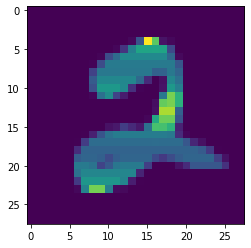

In [170]:
loss, accuracy = bmodel.evaluate(x_test, y_test)
print("loss: ", loss)
print("accuracy: ", accuracy)

y_pred = bmodel.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = numpy.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

prediction = bmodel.predict([x_test])
print('Prediction: ', numpy.argmax(prediction[13]))
plt.imshow(x_test[13])
plt.show()

In [40]:
bdLSTMModel_json = bmodel.to_json()
with open("bdLSTMModel.json", "w") as json_file:
    json_file.write(bdLSTMModel_json)
bmodel.save_weights("bdModel.h5")

bdLSTMModeljsonfile = open('bdLSTMModel.json', 'r')
loaded_bdLSTMModel_json = bdLSTMModeljsonfile.read()
bdLSTMModeljsonfile.close()
bdLSTMModelNew = model_from_json(loaded_bdLSTMModel_json)
bdLSTMModelNew.load_weights("bdModel.h5")

bdLSTMModelNew.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
bdloss, bdaccuracy = bdLSTMModelNew.evaluate(x_test, y_test)



438/438 [==============================] - 22s 48ms/step - loss: 0.0811 - accuracy: 0.9761
What is the file namesample_image3.png
1/1 [==============================] - 0s 430ms/step
3


In [66]:
loss1 = str(bdloss)
accuracy1 = str(bdaccuracy)
file = input("What is the file name")
img = load_image(file)
predict_value = bdLSTMModelNew.predict(img)
bddigit = numpy.argmax(predict_value)
print(bddigit)
digit1 = str(bddigit)
with open('resultsBiDirectionalLSTM.txt', 'w') as f:
    f.write("This is the loss \n")
    f.writelines(loss1)
    f.write("\n")
    f.write("This is the accuracy \n")
    f.writelines(accuracy1)
    f.write("\n")
    f.write("Based on the file inputted, the Bi Directional LSTM Model predicts that the value is :")
    f.write("\n")
    f.writelines(digit1)
    f.close()

What is the file namesample_image3.png
1/1 [==============================] - 0s 25ms/step
3


# RNN-LSTM Implementation

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 28, 256)           291840    
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dense_7 (Dense)             (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 834,250
Trainable params: 834,250
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
329/329 [=============================

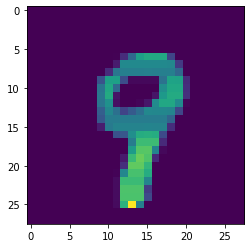

In [42]:
es_callback = EarlyStopping(patience = 2)

rnnModel = Sequential()
#CuDNNLSTM

rnnModel.add(LSTM(256, input_shape=(x_train.shape[1:]),  return_sequences=True, activation='relu'))
rnnModel.add(LSTM(256))
rnnModel.add(Dense(64, activation='softmax'))
rnnModel.add(Dropout(0.2))
rnnModel.add(Dense(10, activation='relu'))
rnnModel.summary()
          

rnnModel.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = rnnModel.fit(x_train, y_train, validation_data=(x_val, y_val), verbose = 1, batch_size=128, epochs=2, callbacks=[es_callback])
results = rnnModel.evaluate(x_test, y_test)
print("test loss, test acc:", results)

rnnModel.summary()
rnnloss, rnnaccuracy = rnnModel.evaluate(x_test, y_test)
print("Loss : " , loss)
print("Accuracy : " , accuracy)

y_pred = rnnModel.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = numpy.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

prediction = rnnModel.predict([x_test])
print('Prediction: ', numpy.argmax(prediction[10]))
plt.imshow(x_test[10])
plt.show()


In [47]:
rnnModel_json = rnnModel.to_json()
with open("rnnModel.json", "w") as json_file:
    json_file.write(rnnModel_json)
rnnModel.save_weights("rnnModel.h5")

rnnModeljsonfile = open('rnnModel.json', 'r')
loaded_rnnModel_json = rnnModeljsonfile.read()
rnnModeljsonfile.close()
rnnModelNew = model_from_json(loaded_rnnModel_json)
rnnModelNew.load_weights("rnnModel.h5")

rnnModelNew.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loss, accuracy = rnnModelNew.evaluate(x_test, y_test)
def load_image(filename):
    img = load_img(filename, grayscale = True, target_size=(28,28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)

    img = img.astype('float32')
    img = img/255.0
    return img
file = input("What is the file name")
img = load_image(file)
predict_value = rnnModelNew.predict(img)
digit = numpy.argmax(predict_value)
print(digit)
rnnloss1 = str(lossrnn)
rnnaccuracy1 = str(accuracyrnn)
rnndigit1 = str(digitrnn)
with open('resultsRNN.txt', 'w') as f:
    f.write("This is the loss \n")
    f.writelines(loss1)
    f.write("\n")
    f.write("This is the accuracy \n")
    f.writelines(accuracy1)
    f.write("\n")
    f.write("Based on the file inputted, this RNN Model predicts that the value is :")
    f.write("\n")
    f.writelines(digit1)
    f.close()

438/438 [==============================] - 10s 20ms/step - loss: 1.3097 - accuracy: 0.6312
What is the file namesample_image5.png
1/1 [==============================] - 0s 437ms/step
6


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 28, 128)           80384     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 213,258
Trainable params: 213,258
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
329/329 [==============================] - 33s 93ms/step - loss: 2.3610 - accuracy: 0.4271 - val_loss: 2.2986 - val_accuracy: 0.0992
Epoch 2/5
329/329 [==================

/Users/aadithyanair/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


438/438 [==============================] - 5s 11ms/step
Prediction:  0


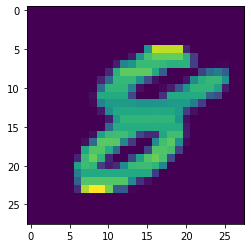

In [38]:
es_callback = EarlyStopping(patience = 3)
model4 = Sequential()
model4.add(LSTM(128,input_shape=(x_train.shape[1:]),  return_sequences=True, activation='relu') )
model4.add(LSTM(128))
model4.add(Dropout(0.2))
model4.add(Dense(10, activation='relu'))
model4.summary()


          

model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model4.fit(x_train, y_train, validation_data=(x_val, y_val), verbose = 1, batch_size=128, epochs=5, callbacks=[es_callback])
results = model4.evaluate(x_test, y_test)
print("test loss, test acc:", results)

model4.summary()
loss, accuracy = model4.evaluate(x_test, y_test)
print("Loss : " , loss)
print("Accuracy : " , accuracy)

y_pred = model4.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = numpy.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

prediction = model4.predict([x_test])
print('Prediction: ', numpy.argmax(prediction[10]))
plt.imshow(x_test[10])
plt.show()

In [39]:
rnn4Model_json = model4.to_json()
with open("rnn4Model.json", "w") as json_file:
    json_file.write(rnn4Model_json)
model4.save_weights("rnn4Model.h5")

rnn4Modeljsonfile = open('rnn4Model.json', 'r')
loaded_rnn4Model_json = rnn4Modeljsonfile.read()
rnn4Modeljsonfile.close()
rnn4ModelNew = model_from_json(loaded_rnn4Model_json)
rnn4ModelNew.load_weights("rnn4Model.h5")

rnn4ModelNew.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loss, accuracy = rnn4ModelNew.evaluate(x_test, y_test)
def load_image(filename):
    img = load_img(filename, grayscale = True, target_size=(28,28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)

    img = img.astype('float32')
    img = img/255.0
    return img
file = input("What is the file name")
img = load_image(file)
predict_value = rnn4ModelNew.predict(img)
digit = numpy.argmax(predict_value)
print(digit)
loss1 = str(loss)
accuracy1 = str(accuracy)
digit1 = str(digit)
with open('resultsRNN4.txt', 'w') as f:
    f.write("This is the loss \n")
    f.writelines(loss1)
    f.write("\n")
    f.write("This is the accuracy \n")
    f.writelines(accuracy1)
    f.write("\n")
    f.write("Based on the file inputted, this RNN Model predicts that the value is :")
    f.write("\n")
    f.writelines(digit1)
    f.close()

438/438 [==============================] - 6s 11ms/step - loss: 2.3026 - accuracy: 0.1004
What is the file namesample_image7.png
1/1 [==============================] - 0s 458ms/step
0


Epoch 1/10
329/329 [==============================] - 16s 41ms/step - loss: 1.9881 - accuracy: 0.4409 - val_loss: 1.7250 - val_accuracy: 0.5829
Epoch 2/10
329/329 [==============================] - 13s 40ms/step - loss: 1.5545 - accuracy: 0.5770 - val_loss: 1.3669 - val_accuracy: 0.6539
Epoch 3/10
329/329 [==============================] - 15s 46ms/step - loss: 1.2797 - accuracy: 0.6077 - val_loss: 1.1264 - val_accuracy: 0.6587
Epoch 4/10
329/329 [==============================] - 13s 41ms/step - loss: 1.0950 - accuracy: 0.6140 - val_loss: 0.9526 - val_accuracy: 0.6696
Epoch 5/10
329/329 [==============================] - 13s 38ms/step - loss: 0.9764 - accuracy: 0.6210 - val_loss: 0.8253 - val_accuracy: 0.6788
Epoch 6/10
329/329 [==============================] - 13s 39ms/step - loss: 0.9045 - accuracy: 0.6229 - val_loss: 0.7727 - val_accuracy: 0.6824
Epoch 7/10
329/329 [==============================] - 13s 39ms/step - loss: 0.8409 - accuracy: 0.6294 - val_loss: 0.7039 - val_accuracy:

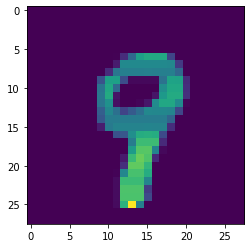

In [48]:
callbacksbb = EarlyStopping(patience = 2)
rnnmodel3 = Sequential()
rnnmodel3.add(LSTM(64,input_shape=(x_train.shape[1:]),  return_sequences=True,  activation ='relu') )
rnnmodel3.add(LSTM(64))
rnnmodel3.add(Dropout(0.1))
rnnmodel3.add(Dense(32, activation='softmax'))
rnnmodel3.add(Dropout(0.1))
rnnmodel3.add(Dense(10, activation='softmax'))
       
rnnmodel3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = rnnmodel3.fit(x_train, y_train, validation_data=(x_val, y_val), verbose = 1, batch_size=128, epochs=10, callbacks=[callbacksbb])
results = rnnmodel3.evaluate(x_test, y_test)
print("test loss, test acc:", results)

rnnmodel3.summary()
loss, accuracy = rnnmodel3.evaluate(x_test, y_test)
print("Loss : " , loss)
print("Accuracy : " , accuracy)

y_pred = rnnmodel3.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = numpy.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

prediction = rnnmodel3.predict([x_test])
print('Prediction: ', numpy.argmax(prediction[10]))
plt.imshow(x_test[10])
plt.show()


In [49]:
rnn3Model_json = rnnmodel3.to_json()
with open("rnn3Model.json", "w") as json_file:
    json_file.write(rnn3Model_json)
rnnmodel3.save_weights("rnn3Model.h5")

rnn3Modeljsonfile = open('rnn3Model.json', 'r')
loaded_rnn3Model_json = rnn3Modeljsonfile.read()
rnn3Modeljsonfile.close()
rnn3ModelNew = model_from_json(loaded_rnn3Model_json)
rnn3ModelNew.load_weights("rnn3Model.h5")

rnn3ModelNew.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loss, accuracy = rnn3ModelNew.evaluate(x_test, y_test)

438/438 [==============================] - 3s 5ms/step - loss: 0.6125 - accuracy: 0.6885


In [50]:

def load_image(filename):
    img = load_img(filename, grayscale = True, target_size=(28,28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)

    img = img.astype('float32')
    img = img/255.0
    return img
file = input("What is the file name")
img = load_image(file)
predict_value = rnn3ModelNew.predict(img)
digit = numpy.argmax(predict_value)
print(digit)
loss1 = str(loss)
accuracy1 = str(accuracy)
digit1 = str(digit)
with open('resultsRNN3.txt', 'w') as f:
    f.write("This is the loss \n")
    f.writelines(loss1)
    f.write("\n")
    f.write("This is the accuracy \n")
    f.writelines(accuracy1)
    f.write("\n")
    f.write("Based on the file inputted, this RNN Model predicts that the value is :")
    f.write("\n")
    f.writelines(digit1)
    f.close()

What is the file namesample_image6.png
1/1 [==============================] - 0s 414ms/step
6


# CNN Implementation

Reshaping the Data

In [51]:
x_train1 = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val1 = x_val.reshape(x_val.shape[0], 28, 28 ,1)
x_test1 = x_test.reshape(x_test.shape[0], 28, 28, 1)



In [52]:
# Model
cnnmodel = Sequential()
cnnmodel.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
cnnmodel.add(BatchNormalization())
cnnmodel.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
cnnmodel.add(BatchNormalization())
cnnmodel.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))
cnnmodel.add(BatchNormalization())
cnnmodel.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))
cnnmodel.add(BatchNormalization())
cnnmodel.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
cnnmodel.add(Flatten())
cnnmodel.add(Dropout(0.2))
cnnmodel.add(Dense(128, activation=tf.nn.relu))
cnnmodel.add(Dense(10,activation=tf.nn.softmax))
cnnmodel.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
cnnmodel.fit(x=x_train1,y=y_train, validation_data=(x_val1, y_val), epochs=4)

Epoch 1/4
1313/1313 [==============================] - 72s 54ms/step - loss: 0.2243 - accuracy: 0.9356 - val_loss: 0.0818 - val_accuracy: 0.9755
Epoch 2/4
1313/1313 [==============================] - 70s 53ms/step - loss: 0.0823 - accuracy: 0.9755 - val_loss: 0.0686 - val_accuracy: 0.9779
Epoch 3/4
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0627 - accuracy: 0.9807 - val_loss: 0.0477 - val_accuracy: 0.9856
Epoch 4/4
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0525 - accuracy: 0.9842 - val_loss: 0.0479 - val_accuracy: 0.9854


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 28)       112       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8096      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 32)        

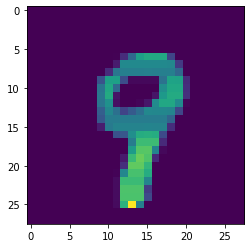

In [53]:
cnnmodel.summary()
loss, accuracy = cnnmodel.evaluate(x_test1, y_test)
print("Loss : " , loss)
print("Accuracy : " , accuracy)

y_pred = cnnmodel.predict(x_test1, batch_size=64, verbose=1)
y_pred_bool = numpy.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

prediction = cnnmodel.predict([x_test1])
print('Prediction: ', numpy.argmax(prediction[10]))
plt.imshow(x_test1[10])
plt.show()

In [56]:
cnnModel_json = cnnmodel.to_json()
with open("cnnModel.json", "w") as json_file:
    json_file.write(cnnModel_json)
cnnmodel.save_weights("cnnModel.h5")

cnnModeljsonfile = open('cnnModel.json', 'r')
loaded_cnnModel_json = cnnModeljsonfile.read()
cnnModeljsonfile.close()
cnnModelNew = model_from_json(loaded_cnnModel_json)
cnnModelNew.load_weights("cnnModel.h5")

cnnModelNew.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loss, accuracy = cnnModelNew.evaluate(x_test, y_test)


438/438 [==============================] - 4s 8ms/step - loss: 0.0485 - accuracy: 0.9856


In [57]:
def load_image(filename):
    img = load_img(filename, grayscale = True, target_size=(28,28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)

    img = img.astype('float32')
    img = img/255.0
    return img
file = input("What is the file name")
img = load_image(file)
predict_value = cnnModelNew.predict(img)
digit = numpy.argmax(predict_value)
print(digit)
loss1 = str(loss)
accuracy1 = str(accuracy)
digit1 = str(digit)
with open('resultsCNN.txt', 'w') as f:
    f.write("This is the loss \n")
    f.writelines(loss1)
    f.write("\n")
    f.write("This is the accuracy \n")
    f.writelines(accuracy1)
    f.write("\n")
    f.write("Based on the file inputted, the CNN Model predicts that the value is :")
    f.write("\n")
    f.writelines(digit1)
    f.close()

What is the file namesample_image8.png
1/1 [==============================] - 0s 109ms/step
8


# Training Different CNN Architectures

# GRU Implementation

In [58]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [59]:
gru = Sequential([
    GRU(256, input_shape=(28,28), return_sequences=True, activation='relu'),
    GRU(256, activation='relu'),
    Dense(10, activation='softmax')  
    ])
gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
gru.summary()
# Callbacks
gru.fit(x_train, y_train, validation_data=(x_val, y_val), verbose=1, batch_size=64, epochs=4)





Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 28, 256)           219648    
                                                                 
 gru_1 (GRU)                 (None, 256)               394752    
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 616,970
Trainable params: 616,970
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
657/657 [==============================] - 61s 90ms/step - loss: 0.5247 - accuracy: 0.8170 - val_loss: 0.1616 - val_accuracy: 0.9492
Epoch 2/4
657/657 [==============================] - 60s 91ms/step - loss: 0.1287 - accuracy: 0.9599 - val_loss: 0.0960 - val_accuracy: 0.9706
Epoch 3/4
657/657 [=======

In [60]:
loss, accuracy = gru.evaluate(x_test, y_test)
print("loss : " , loss)
print("accuracy : " , accuracy)


438/438 [==============================] - 6s 15ms/step - loss: 0.0540 - accuracy: 0.9826
loss :  0.053998902440071106
accuracy :  0.9825714230537415


In [61]:
y_pred = gru.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = numpy.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

219/219 [==============================] - 6s 28ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1359
           1       0.99      0.99      0.99      1589
           2       0.99      0.98      0.98      1358
           3       0.99      0.97      0.98      1429
           4       0.98      0.98      0.98      1355
           5       0.97      0.98      0.98      1315
           6       0.98      0.99      0.99      1358
           7       0.99      0.98      0.99      1446
           8       0.98      0.98      0.98      1395
           9       0.97      0.97      0.97      1396

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



438/438 [==============================] - 7s 14ms/step
Prediction:  9


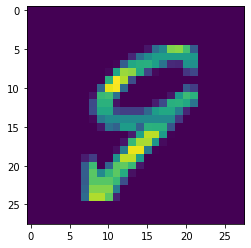

In [62]:
prediction = gru.predict([x_test])
print('Prediction: ', numpy.argmax(prediction[15]))
plt.imshow(x_test[15])
plt.show()

In [63]:
gruModel_json = gru.to_json()
with open("gruModel.json", "w") as json_file:
    json_file.write(gruModel_json)
gru.save_weights("gruModel.h5")

gruModeljsonfile = open('gruModel.json', 'r')
loaded_gruModel_json = gruModeljsonfile.read()
gruModeljsonfile.close()
gruModelNew = model_from_json(loaded_gruModel_json)
gruModelNew.load_weights("gruModel.h5")

gruModelNew.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
loss, accuracy = gruModelNew.evaluate(x_test, y_test)



438/438 [==============================] - 7s 14ms/step - loss: 0.0540 - accuracy: 0.9826


In [65]:
def load_image(filename):
    img = load_img(filename, grayscale = True, target_size=(28,28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)

    img = img.astype('float32')
    img = img/255.0
    return img
file = input("What is the file name")
img = load_image(file)
predict_value = gruModelNew.predict(img)
digit = numpy.argmax(predict_value)
print(digit)
loss1 = str(loss)
accuracy1 = str(accuracy)
digit1 = str(digit)
with open('resultsGRU.txt', 'w') as f:
    f.write("This is the loss \n")
    f.writelines(loss1)
    f.write("\n")
    f.write("This is the accuracy \n")
    f.writelines(accuracy1)
    f.write("\n")
    f.write("Based on the file inputted, the GRU Model predicts that the value is :")
    f.write("\n")
    f.writelines(digit1)
    f.close()

What is the file namesample_image7.png
1/1 [==============================] - 0s 23ms/step
7


In [ ]:
!pip install session-info
import session_info
session_info.show()